<a href="https://colab.research.google.com/github/moneypitak/multivariate/blob/main/Chapter_4_MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Example on Iris dataset

In [73]:
import pandas as pd


In [74]:
example_df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
example_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica



### ลอง plot PCA เพื่อเปรียบเทียบกับ วิธี MDS

In [75]:
from sklearn.decomposition import PCA

In [76]:

pca = PCA(n_components=2)

In [77]:
new_pca = pca.fit_transform(example_df.iloc[:,:-1])

In [78]:
from matplotlib import pyplot as plt

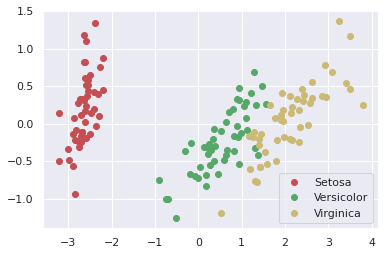

In [79]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or',label='Setosa')
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'og',label='Versicolor')
plt.plot(new_pca[100:,0],new_pca[100:,1],'oy',label='Virginica')
plt.legend()

### MDS (Multidimensional Scaling)

Distance

In [80]:
X1 = example_df.iloc[0,:-1].to_numpy()
X1

array([5.1, 3.5, 1.4, 0.2], dtype=object)

In [81]:
X2 = example_df.iloc[1,:-1].to_numpy()
X2

array([4.9, 3.0, 1.4, 0.2], dtype=object)

In [82]:
import numpy as np

In [83]:
dist = np.linalg.norm(X1-X2)
dist

0.5385164807134502

Distance Matrix

In [84]:
from sklearn.metrics import pairwise_distances
dis_matrix = pairwise_distances(example_df.iloc[:,:-1])
dis_matrix

array([[0.        , 0.53851648, 0.50990195, ..., 4.45982062, 4.65080638,
        4.14004831],
       [0.53851648, 0.        , 0.3       , ..., 4.49888875, 4.71805044,
        4.15331193],
       [0.50990195, 0.3       , 0.        , ..., 4.66154481, 4.84871117,
        4.29883705],
       ...,
       [4.45982062, 4.49888875, 4.66154481, ..., 0.        , 0.6164414 ,
        0.64031242],
       [4.65080638, 4.71805044, 4.84871117, ..., 0.6164414 , 0.        ,
        0.76811457],
       [4.14004831, 4.15331193, 4.29883705, ..., 0.64031242, 0.76811457,
        0.        ]])

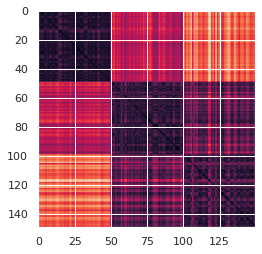

In [85]:
plt.imshow(dis_matrix)

ทำ MDS

In [86]:
from sklearn.manifold import MDS

In [87]:
mds = MDS(n_components=2)

In [88]:
new_mds = mds.fit_transform(example_df.iloc[:,:-1])

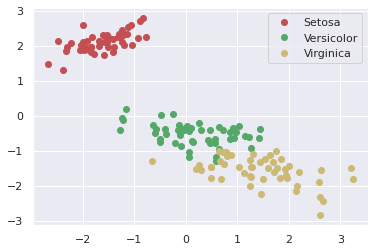

In [89]:
plt.plot(new_mds[:50,0],new_mds[:50,1],'or',label='Setosa')
plt.plot(new_mds[50:100,0],new_mds[50:100,1],'og',label='Versicolor')
plt.plot(new_mds[100:,0],new_mds[100:,1],'oy',label='Virginica')
plt.legend()

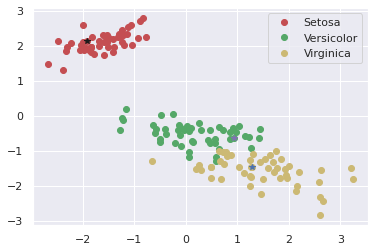

In [90]:
plt.plot(new_mds[:50,0],new_mds[:50,1],'or',label='Setosa')
plt.plot(new_mds[50:100,0],new_mds[50:100,1],'og',label='Versicolor')
plt.plot(new_mds[100:,0],new_mds[100:,1],'oy',label='Virginica')
plt.plot(new_mds[6,0],new_mds[6,1],'*k')
plt.plot(new_mds[56,0],new_mds[56,1],'*m')
plt.plot(new_mds[116,0],new_mds[116,1],'*b')
plt.legend()

การใช้ Pre-computed Distance Matrix

In [91]:
dis_matrix = pairwise_distances(example_df.iloc[:,:-1],metric = 'cityblock') ##‘cityblock’

In [92]:
mds2 = MDS(n_components=2,dissimilarity='precomputed')

In [93]:
new_mds2 = mds2.fit_transform(dis_matrix)

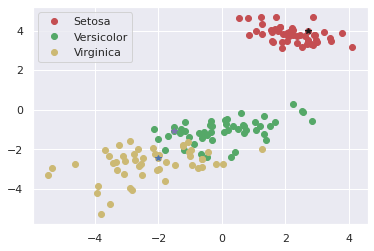

In [94]:
plt.plot(new_mds2[:50,0],new_mds2[:50,1],'or',label='Setosa')
plt.plot(new_mds2[50:100,0],new_mds2[50:100,1],'og',label='Versicolor')
plt.plot(new_mds2[100:,0],new_mds2[100:,1],'oy',label='Virginica')
plt.plot(new_mds2[6,0],new_mds2[6,1],'*k')
plt.plot(new_mds2[56,0],new_mds2[56,1],'*m')
plt.plot(new_mds2[116,0],new_mds2[116,1],'*b')
plt.legend()

Example 2

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [96]:
def make_hello(N=1000, rseed=42): # โดยที่ N คือจำนวนจุดที่ plot ลงกราฟ
    # Make a plot with "HELLO" text; save as PNG # จะพล็อตจุดให้เป็น HELLO
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])] # return เพื่อนำจุดไปใช้ต่อ

In [97]:
X = make_hello(1000) # 1000 คือจำนวนจุด

In [98]:
X.shape

(1000, 2)

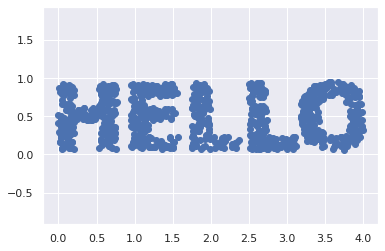

In [99]:
plt.scatter(X[:,0],X[:,1]) # plot จุดลงแต่ไม่ได้ใส่สี
plt.axis('equal'); # จัดให้จุดมีลักษณะที่สวยงาม

In [100]:
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))

In [101]:
colorize['c'].shape # c คือค่าในแนวแกน X

(1000,)

In [102]:
colorize['cmap']

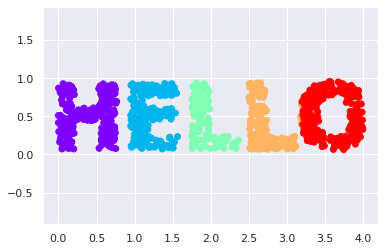

In [103]:
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal'); # plot แบบใส่สี **colorize

In [104]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)

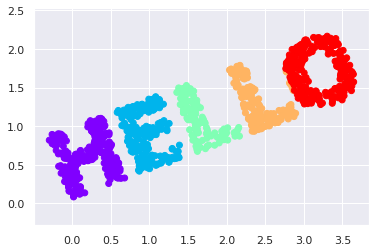

In [105]:
X2 = rotate(X, 20) # 20 คือองศาที่หมุน เช่น หมุน 20 องศา
plt.scatter(X2[:, 0], X2[:, 1], **colorize) # เมื่อหมุนแล้วสีต้องเป็นแบบเดิม
plt.axis('equal'); # เวลา plot กราฟ ใส่ ; เพื่อไม่ให้โชว์ตัวอื่นนอกจากกราฟ

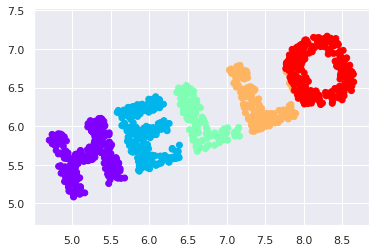

In [106]:
X2 = rotate(X, 20) + 5 # +5 เลื่อนไปแกนละ 5 หน่วย x5 y5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

## MDS
ดูระยะห่างของจุดแต่ละจุด

In [107]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(1000, 1000)

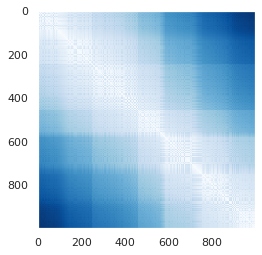

In [108]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest') # ถ้าไม่ใส่แถบสีก็จะไม่รู้ว่าสีอะไรบอกว่าตำแหน่งไหนคืออะไร


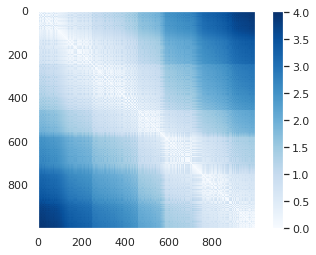

In [109]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar(); # เหมือนกับโค๊ดด้านบน แต่ในโค๊ดบรรทัดนี้เพิ่มแถบสีด้านข้างเข้าไปด้วย

In [110]:
D2 = pairwise_distances(X2)

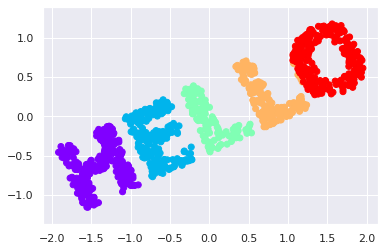

In [111]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize) 
plt.axis('equal');


random state

zorder in plt.import

p.allclose









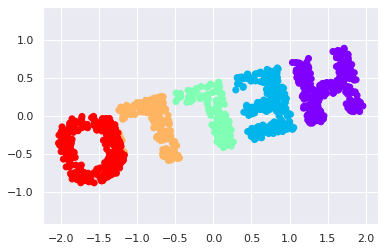

In [112]:

from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed')
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

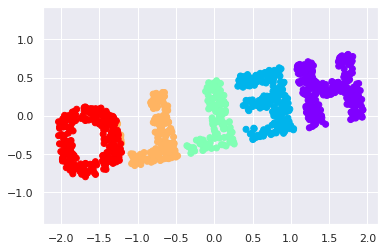

In [113]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed') 
out = model.fit_transform(D) 
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

Quiz 4 ทดลองทำ pca กับข้อมูล X แล้ว plotgraph และดูผลว่าการกระจายของข้อมูลมันเปลี่ยนไปหรือไม่ อย่างไร

ส่งก่อน 13.15 commit ว่า quiz 4

In [114]:
import numpy as np
from sklearn.decomposition import PCA

In [115]:
pca = PCA(n_components=2)

In [116]:
New_pca = pca.fit_transform(X)

In [117]:
New_pca

array([[-1.9337476 , -0.08154573],
       [-1.93360269,  0.01301875],
       [-1.93284845,  0.37256384],
       ...,
       [ 2.05704731, -0.03171414],
       [ 2.05815725, -0.1327384 ],
       [ 2.06207964, -0.15679672]])

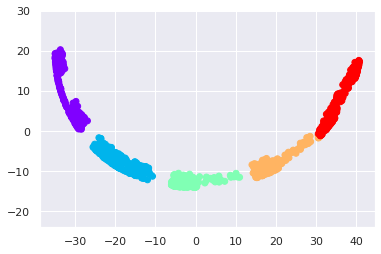

In [118]:
from sklearn.decomposition import PCA
model =PCA(n_components=2)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

รูปร่างของกราฟไม่เหมือน MDS เพราะจุดไม่ได้กระจายเป็นตัวอักษรตามที่ต้องการ

# Answer

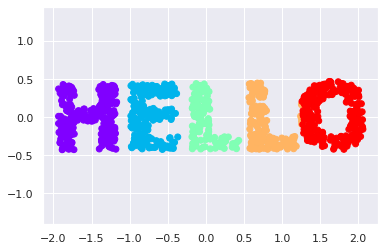

In [119]:

model = PCA(n_components=2)
out = model.fit_transform(X2)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

PCA ที่ไม่เป็นรูปแบบแหว่งก็เพราะว่า PCA ได้หา eigen ที่แกนกระจายมากที่สุด ความแปรปวนมากที่สุด ถึงจะหมุนไปกี่องศา PCA ก็จะหมุนกลับมาแกนมาเหมือนเดิม 